# Regression

This is predictig a value of continuous variable.

- Create regression model
- Performance metrics
- k-fold cross-validation and apply regularization to reduce overfitting

---

The use of a regression algorithm follows the same flow as other algorithms

```python
from sklearn.module import Model

model = Model()

model.fit(X, y)

model.predict(X_new)
```

## Intro to Linear Regression

---

Through out this course we will be using the diabetes dataset:

In [1]:
import pandas as pd
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Linear Regression with one variable

To get the conceptualize linear regression it is best to create a model that only accepts one column and so:

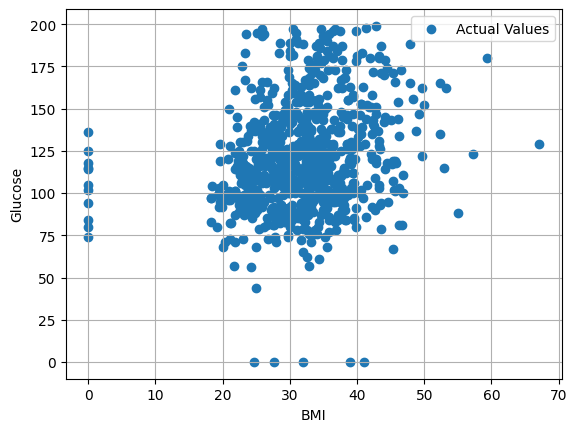

In [8]:
import matplotlib.pyplot as plt

# Plotting the values
plt.scatter(X_bmi, y, label = "Actual Values")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.grid()
plt.legend()
plt.show()

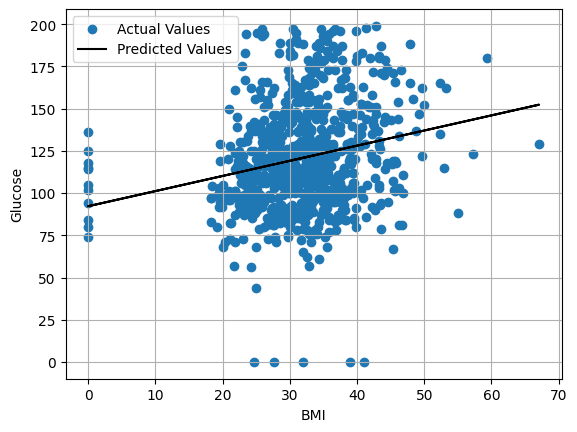

In [14]:
from sklearn.linear_model import LinearRegression
X_bmi = diabetes_df[['bmi']]
y = diabetes_df[['glucose']]
model = LinearRegression()
model.fit(X_bmi, y)
y_pred = model.predict(X_bmi)

# Plotting the values
plt.scatter(X_bmi, y, label = "Actual Values")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.grid()
plt.plot(X_bmi, y_pred, label = "Predicted Values", color = "black")
plt.legend()
plt.show()

## Linear Regression Demystified

Linear regrssion simply means we are trying to fit the fittest line to our observation (fittest means closest to the observation as possible). Like kim, you will not draw a horizontal line to a scatter plot where each observation joins to form a diagonal line.

The line follows the formula: 
$$ y = mx + b $$ and remember that the values of `m` and `b` define how the line will behave so it is reasonable then to find the best m and b that minimize the cost function (the difference between the line and the actual values). 

## Multiple Linear Regression

---
This follows the same flow as the simple linear regression—we just manipulate the data (input) that we will use to fit the model.

In [15]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


So if we want to predict the glucose of an observation or fit a line to the values we can do:

In [22]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop("glucose", axis = 1)
y = diabetes_df["glucose"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# instantiate
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

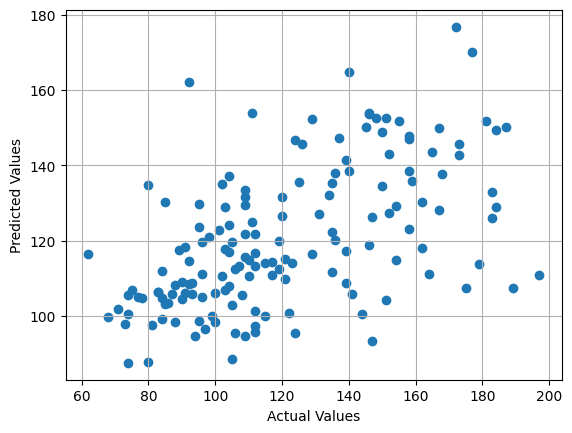

In [25]:
# plotting the data we get

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

## Linear Regression Accuracy

---
The default metric when measuring the accuracy is the R-squared (0 - 1). 1 being the highest so that is what is used with the `model.score()`

The following are the tools you can use to measure the accuracy of a linear regression model: 


**Arguments**

| Arguments       | Description                                                   | Syntax                                      |
|----------------|---------------------------------------------------------------|---------------------------------------------|
| X_test         | Feature matrix for the test data                              | `model.score(X_test, y_test)`               |
| y_test         | Actual labels for the test data                               | `model.score(X_test, y_test)`               |
| y_true         | Actual labels for the test data                               | `mean_squared_error(y_true, y_pred, squared=)` |
| y_pred         | Predicted labels for the test data                            | `mean_squared_error(y_true, y_pred, squared=)` |
| squared        | If False, returns the square root of the MSE (RMSE)            | `mean_squared_error(y_true, y_pred, squared=)` |

**Functions**

| Functions            | Description                                                   | Syntax                                      |
|----------------------|---------------------------------------------------------------|---------------------------------------------|
| .score()             | Computes R-squared, the default metric for linear regression. R-squared values range from 0 to 1, with 1 indicating that the features completely explain the target's variance. | `model.score(X_test, y_test)`               |
| mean_squared_error   | Calculates the mean squared error (MSE) or root mean squared error (RMSE). MSE is measured in units of the target variable squared, while RMSE is in the same units as the target variable. Lower values indicate better model performance. | `mean_squared_error(y_true, y_pred, squared=)` |


## Cross-Validation

---

Model performance is dependent on the way we split up the data. And to solve the problem we do the technique called the cross validation. 

The percentage of data used for testing in each iteration depends on the number of folds (k). When you increase the number of folds, the size of each test set decreases. For example, with 20 folds, each fold contains 5% of the data (1/20 = 5%). And it is okay to have less than 20% because in k-folds you are using each subset.

The following are the tools you can use with cross validation:

**Importing to be able to do cross-validation:**
`from sklearn.model_selection import cross_val_score, Kfold`

**Arguments**

| Arguments     | Description                                                       | Syntax                                    |
|--------------|-------------------------------------------------------------------|-------------------------------------------|
| n_splits     | Defines the number of folds in cross-validation                   | `KFold(n_splits=)`                         |
| shuffle      | Determines whether to shuffle data before splitting into folds    | `KFold(shuffle=)`                          |
| random_state | Sets a seed for reproducibility                                   | `KFold(random_state=)`                     |
| cv           | Specifies the cross-validation strategy                           | `cross_val_score(..., cv=)`                |

**Functions**

| Functions         | Description                                                 | Syntax                                    |
|------------------|-------------------------------------------------------------|-------------------------------------------|
| KFold           | Initializes a k-fold cross-validation object                 | `KFold(n_splits=, shuffle=, random_state=)` |
| cross_val_score | Computes cross-validation scores for a given model           | `cross_val_score(model, X, y, cv=)`        |
| mean            | Computes the mean of an array                                | `np.mean(cv_results)`                      |
| std             | Computes the standard deviation of an array                  | `np.std(cv_results)`                       |
| quantile        | Computes quantiles of an array                               | `np.quantile(cv_results, [lower, upper])`  |

After you get the list of scores for each fold you get its descriptive stats to tell something about the possiblt true value of the score.

If you do not specify the scoring argument in scikit-learn's cross-validation functions, the default scoring metric for the estimator you are using will be applied. The default scoring metric varies depending on the type of estimator (e.g., regression, classification).

**Default Scoring Metrics:**
- Regression Models: For regression models, the default scoring metric is the coefficient of determination, 𝑅^2 This metric measures how well the model's predictions match the actual values, with higher values indicating better performance.
- Classification Models: For classification models, the default scoring metric is accuracy. This metric measures the proportion of correctly classified instances out of the total instances.

# Study more about Confidence Interval from chatGPT

## Choosing the Scoring Metric for Cross-Validation
--- 

When performing cross-validation to evaluate your machine learning model, selecting the appropriate scoring metric is crucial. Here are some guidelines to help you choose the right scoring metric:

### 1. Understand Your Problem Type
- **Regression**: Predicting continuous values (e.g., house prices, temperatures).
- **Classification**: Predicting categorical values (e.g., spam or not spam, disease presence).

### 2. Common Scoring Metrics

#### Regression Metrics
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower values indicate better performance.
  - Use `scoring='neg_mean_squared_error'` in `scikit-learn`.
- **Root Mean Squared Error (RMSE)**: Square root of MSE, providing error in the same units as the target variable.
  - Calculate RMSE from `neg_mean_squared_error` scores.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between actual and predicted values. Less sensitive to outliers than MSE.
  - Use `scoring='neg_mean_absolute_error'`.
- **R-squared (\( R^2 \))**: Measures the proportion of variance explained by the model. Higher values indicate better performance.
  - Use `scoring='r2'`.

#### Classification Metrics
- **Accuracy**: Measures the proportion of correctly classified instances. Suitable for balanced datasets.
  - Use `scoring='accuracy'`.
- **Precision**: Measures the proportion of true positives among predicted positives. Useful for imbalanced datasets.
  - Use `scoring='precision'`.
- **Recall**: Measures the proportion of true positives among actual positives. Useful for imbalanced datasets.
  - Use `scoring='recall'`.
- **F1 Score**: Harmonic mean of precision and recall. Balances precision and recall.
  - Use `scoring='f1'`.
- **Area Under the ROC Curve (AUC-ROC)**: Measures the ability of the model to distinguish between classes. Higher values indicate better performance.
  - Use `scoring='roc_auc'`.

### 3. Consider Your Goals
- **Minimize Error**: Use MSE, RMSE, or MAE for regression tasks.
- **Maximize Explained Variance**: Use \( R^2 \) for regression tasks.
- **Handle Imbalanced Data**: Use precision, recall, or F1 score for classification tasks.
- **Evaluate Overall Performance**: Use accuracy for balanced classification tasks or AUC-ROC for overall classification performance.

### 4. Example Code

Here's an example of how to use different scoring metrics in cross-validation:

```python
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Create a sample regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Instantiate the Ridge regression model
model = Ridge()

# Perform cross-validation with different scoring metrics
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

print("MSE Scores:", mse_scores)
print("RMSE Scores:", rmse_scores)
print("R^2 Scores:", r2_scores)


## Regularized Regression

---

This is used to avoid overfitting in regression. Remember that fitting a line requires the manipulation of the variables `a` and `b` and we have a variable called alpha (hyperparameter) that selects the right parameters. We have two regularized regression alogirthms:

- Ridge

OLS Loss (cost function) + another function that uses the alpha: $$\alpha \times  \sum_{i=1}^{n} a_{i}^2$$

- Lasso

OLS Loss (cost function) + another function that uses the alpha: $$\alpha \times \sum_{i=1}^{n} |a_{i}|$$

## Ridge Regression

---
Ridge penalizes models with large positive and negative coefficients. From the given formula if the alpha is zero then you are just using the OLS and therefore the coefficients are not supervised and **overfitting** may occur and a high alpha may result in **underfitting**.

To use Ridge regression in scikit learn we can do the flow:

- Create empty list for the scores of different alpha
- Loop through different alpha values
- Instantiate ridge
- Fit
- Predict
- Append the score to the list

```python
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
```

## Lasso Regression

---

The use of lasso is the same with the Ridge:

- Create empty list for the scores of different alpha
- Loop through different alpha values
- Instantiate the model
- Fit
- Predict
- Append the score to the list

```python
from sklearn.linear_model import lasso
scores[]
for alpha in [0.01, 1.0, 10.0, 100.0, 1000.0]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    lasso.predict(X_test)
    scores.append(ridge.score(X_test, y_test)
```

## Lasso Regression for Feature Selection

---

- Lasso model can select important features of a dataset
- Because it shrinks the coefficient of less important to zero

To do this we follow:
- Initializing X and y
- Instantiate model
- Fit the model to the data and use the `.coef_` attribute and assign it to a variable
- Plot

```python
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_
```
That will return a list of coefficients for every feature.

END